In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "1"
os.environ["OPENBLAS_NUM_THREADS"] = "1"
from pylab import *
from pysb.core import *
from pysb.bng import *
from pysb.integrate import *
import matplotlib.pyplot as plt
import numpy as np
from pysb.util import alias_model_components
from pysb.simulator import CupSodaSimulator
from pysb.simulator import ScipyOdeSimulator
from pysb.simulator.bng import BngSimulator
from necro_uncal_new_updated import model as model100
from necro_uncal_new_10tnf import model as model10
# from necro_uncal_new_1tnf import model as model1
# from necro_uncal_new_01tnf import model as model01
import pandas as pd
# alias_model_components(model100, model10, model1, model01)
from scipy import stats
from pysb.simulator import SimulationResult

In [2]:
print(list(model100.initial_conditions))

[(TNF(brec=None), Parameter('TNF_0', 2326.0)), (TNFR(blig=None, brip=None, bDD=None), Parameter('TNFR_0', 4800.0)), (TRADD(brec=None, brip=None, state='unmod', bDD1=None, bDD2=None), Parameter('TRADD_0', 4696.0)), (RIP1(bscf=None, bub1=None, bub2=None, bub3=None, bDD=None, btraf=None, bRHIM=None, bMLKL=None, state='unmod'), Parameter('RIP1_0', 40000.0)), (TRAF(brip=None, bciap=None, bcyld=None, state='unmod'), Parameter('TRAF_0', 11776.0)), (cIAP(btraf=None), Parameter('cIAP_0', 9000.0)), (MLKL(bRHIM=None, state='unmod'), Parameter('MLKLa_0', 5544.0)), (A20(brip=None), Parameter('A20_0', 9000.0)), (CYLD(brip=None, btraf=None), Parameter('CYLD_0', 9000.0)), (FADD(bDD=None, bDED1=None, bDED2=None), Parameter('FADD_0', 3109.0)), (RIP3(bRHIM=None, bDD=None, state='unmod'), Parameter('RIP3_0', 10654.0)), (flip_L(bDED=None, state='A'), Parameter('flip_L_0', 3900.0)), (LUBAC(brip=None), Parameter('Lubac_0', 7226.0)), (C8(bf=None, flip=None, state='I'), Parameter('C8_0', 3799.0))]


In [3]:
clus0_100 = np.load('necro_pars_cluster0_5620.npy')
clus1_100 = np.load('necro_pars_cluster1_5620.npy')
clus2_100 = np.load('necro_pars_cluster2_5620.npy')

In [4]:
print(len(clus0_100))
print(len(clus1_100))
print(len(clus2_100))

1236
2536
1228


# 100 TNF A20 KO Clusters 0,1,2

In [6]:
m = model100.components 

In [7]:
print('running simulations cluster 0 100 TNF')
tspan = np.linspace(0, 1440, 300)
solvera200 = ScipyOdeSimulator(model100, tspan=tspan, verbose = True)
a20clus0 = solvera200.run(initials = {m.A20(brip = None):0},
                         param_values=clus0_100, num_processors = 10)
# a20clus0.save('pydyno_s36prod_5k_5620_100tnf_cluster0pars_a20ko.h5',include_obs_exprs = True)
# df0_100 = a20clus0.dataframe

2020-05-14 21:13:37.476 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Simulator created


running simulations cluster 0 100 TNF


2020-05-14 21:13:37.946 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Equation mode set to "cython"
2020-05-14 21:13:38.006 - pysb.simulator.scipyode - INFO - [necro_uncal_new_updated] Simulation(s) started
2020-05-14 21:13:38.123 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Multi-processor (parallel) mode using 10 processes
2020-05-14 21:13:54.983 - pysb.simulator.scipyode - INFO - [necro_uncal_new_updated] All simulation(s) complete
2020-05-14 21:13:54.984 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] SimulationResult constructor started
2020-05-14 21:13:55.367 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] SimulationResult constructor finished


In [9]:
print('running simulations cluster 1 100 TNF')
tspan = np.linspace(0, 1440, 300)
solvera201 = ScipyOdeSimulator(model100, tspan=tspan, verbose = True)
a20clus1 = solvera201.run(initials = {m.A20(brip = None):0},
                         param_values=clus1_100, num_processors = 10)
# a20clus1.save('pydyno_s36prod_5k_5620_100tnf_cluster1pars_a20ko.h5',include_obs_exprs = True)
# df1_100 = a20clus1.dataframe

2020-05-14 21:14:03.219 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Simulator created
2020-05-14 21:14:03.223 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Equation mode set to "cython"
2020-05-14 21:14:03.254 - pysb.simulator.scipyode - INFO - [necro_uncal_new_updated] Simulation(s) started


running simulations cluster 1 100 TNF


2020-05-14 21:14:03.464 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Multi-processor (parallel) mode using 10 processes
2020-05-14 21:14:38.194 - pysb.simulator.scipyode - INFO - [necro_uncal_new_updated] All simulation(s) complete
2020-05-14 21:14:38.195 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] SimulationResult constructor started
2020-05-14 21:14:38.996 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] SimulationResult constructor finished


In [10]:
print('running simulations cluster 2 100 TNF')
tspan = np.linspace(0, 1440, 300)
solvera202 = ScipyOdeSimulator(model100, tspan=tspan, verbose = True)
a20clus2 = solvera202.run(initials = {m.A20(brip = None):0},
                         param_values=clus2_100, num_processors = 10)
# simclus2.save('pydyno_s36prod_5k_5620_100tnf_cluster2pars_a20ko.h5',include_obs_exprs = True)
# df2_100 = simclus2.dataframe

2020-05-14 21:14:39.004 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Simulator created
2020-05-14 21:14:39.008 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Equation mode set to "cython"
2020-05-14 21:14:39.039 - pysb.simulator.scipyode - INFO - [necro_uncal_new_updated] Simulation(s) started
2020-05-14 21:14:39.155 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Multi-processor (parallel) mode using 10 processes


running simulations cluster 2 100 TNF


2020-05-14 21:14:56.453 - pysb.simulator.scipyode - INFO - [necro_uncal_new_updated] All simulation(s) complete
2020-05-14 21:14:56.454 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] SimulationResult constructor started
2020-05-14 21:14:56.832 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] SimulationResult constructor finished


In [ ]:
c0_100_a20ko = df0_100
c1_100_a20ko = df1_100
c2_100_a20ko = df2_100

# 100 TNF CYLD KO Clusters 0,1,2

In [11]:
print('running simulations cluster 0 100 TNF')
tspan = np.linspace(0, 1440, 300)
solvercyld0 = ScipyOdeSimulator(model100, tspan=tspan, verbose = True)
cyldclus0 = solvercyld0.run(initials = {m.CYLD(brip=None, btraf = None):0},
                         param_values=clus0_100, num_processors = 12)
# simclus000.save('pydyno_s36prod_5k_5620_100tnf_cluster0pars_cyldko.h5',include_obs_exprs = True)
# c0_100_cyldko = simclus000.dataframe

2020-05-14 21:14:56.838 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Simulator created
2020-05-14 21:14:56.842 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Equation mode set to "cython"
2020-05-14 21:14:56.874 - pysb.simulator.scipyode - INFO - [necro_uncal_new_updated] Simulation(s) started
2020-05-14 21:14:56.992 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Multi-processor (parallel) mode using 12 processes


running simulations cluster 0 100 TNF


2020-05-14 21:15:09.059 - pysb.simulator.scipyode - INFO - [necro_uncal_new_updated] All simulation(s) complete
2020-05-14 21:15:09.060 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] SimulationResult constructor started
2020-05-14 21:15:09.443 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] SimulationResult constructor finished


In [12]:
print('running simulations cluster 1 100 TNF')
tspan = np.linspace(0, 1440, 300)
solvercyld1 = ScipyOdeSimulator(model100, tspan=tspan, verbose = True)
cyldclus1 = solvercyld1.run(initials = {m.CYLD(brip=None, btraf = None):0},
                         param_values=clus1_100, num_processors = 12)
# simclus111.save('pydyno_s36prod_5k_5620_100tnf_cluster1pars_cyldko.h5',include_obs_exprs = True)
# c1_100_cyldko= simclus111.dataframe

2020-05-14 21:15:09.451 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Simulator created
2020-05-14 21:15:09.456 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Equation mode set to "cython"
2020-05-14 21:15:09.487 - pysb.simulator.scipyode - INFO - [necro_uncal_new_updated] Simulation(s) started


running simulations cluster 1 100 TNF


2020-05-14 21:15:09.697 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Multi-processor (parallel) mode using 12 processes
2020-05-14 21:15:33.992 - pysb.simulator.scipyode - INFO - [necro_uncal_new_updated] All simulation(s) complete
2020-05-14 21:15:33.993 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] SimulationResult constructor started
2020-05-14 21:15:34.748 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] SimulationResult constructor finished


In [13]:
print('running simulations cluster 2 100 TNF')
tspan = np.linspace(0, 1440, 300)
solvercyld2 = ScipyOdeSimulator(model100, tspan=tspan, verbose = True)
cyldclus2 = solvercyld2.run(initials = {m.CYLD(brip=None, btraf = None):0},
                         param_values=clus2_100, num_processors = 12)
# simclus222.save('pydyno_s36prod_5k_5620_100tnf_cluster2pars_clydko.h5',include_obs_exprs = True)
# c2_100_cyldko = simclus222.dataframe

2020-05-14 21:15:34.756 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Simulator created
2020-05-14 21:15:34.760 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Equation mode set to "cython"
2020-05-14 21:15:34.791 - pysb.simulator.scipyode - INFO - [necro_uncal_new_updated] Simulation(s) started
2020-05-14 21:15:34.909 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Multi-processor (parallel) mode using 12 processes


running simulations cluster 2 100 TNF


2020-05-14 21:15:46.958 - pysb.simulator.scipyode - INFO - [necro_uncal_new_updated] All simulation(s) complete
2020-05-14 21:15:46.958 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] SimulationResult constructor started
2020-05-14 21:15:47.337 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] SimulationResult constructor finished


In [16]:
from necro_uncal_new_10tnf import model as model10
par_files = np.load('most_likely_par_5k_necropydream_may62020.npy')
n_pars = len(par_files)
all_pars = np.zeros((n_pars, len(model100.parameters)))

rate_params = model100.parameters_rules() # these are only the parameters involved in the rules
param_values = np.array([p.value for p in model100.parameters]) # these are all the parameters
rate_mask = np.array([p in rate_params for p in model100.parameters])

for i in range(n_pars):
    par = par_files[i]
    param_values[rate_mask] = 10 ** par
    all_pars[i] = param_values
print(len(all_pars))

5000


In [17]:
par_files = np.load('most_likely_par_5k_necropydream_may62020.npy')
n_pars = len(par_files)
all_pars2 = np.zeros((n_pars, len(model10.parameters)))

rate_params = model10.parameters_rules() # these are only the parameters involved in the rules
param_values = np.array([p.value for p in model10.parameters]) # these are all the parameters
rate_mask = np.array([p in rate_params for p in model10.parameters])

for i in range(n_pars):
    par = par_files[i]
    param_values[rate_mask] = 10 ** par
    all_pars2[i] = param_values
print(len(all_pars2)) 

5000


In [18]:
tspan = np.linspace(0, 1440, 300)
solver100 = ScipyOdeSimulator(model100, tspan=tspan, verbose = True)
result100 = solver100.run(param_values=all_pars, num_processors = 10)

2020-05-14 21:16:18.818 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Simulator created
2020-05-14 21:16:18.824 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Equation mode set to "cython"
2020-05-14 21:16:18.860 - pysb.simulator.scipyode - INFO - [necro_uncal_new_updated] Simulation(s) started
2020-05-14 21:16:19.257 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Multi-processor (parallel) mode using 10 processes
2020-05-14 21:17:27.381 - pysb.simulator.scipyode - INFO - [necro_uncal_new_updated] All simulation(s) complete
2020-05-14 21:17:27.381 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] SimulationResult constructor started
2020-05-14 21:17:28.929 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] SimulationResult constructor finished


In [19]:
tspan = np.linspace(0, 1440, 300)
solver10 = ScipyOdeSimulator(model10, tspan=tspan, verbose = True)
result10 = solver10.run(param_values=all_pars2, num_processors = 10)

2020-05-14 21:17:28.938 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] Simulator created
2020-05-14 21:17:28.946 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] Equation mode set to "cython"
2020-05-14 21:17:28.980 - pysb.simulator.scipyode - INFO - [necro_uncal_new_10tnf] Simulation(s) started
2020-05-14 21:17:29.374 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] Multi-processor (parallel) mode using 10 processes
2020-05-14 21:18:14.994 - pysb.simulator.scipyode - INFO - [necro_uncal_new_10tnf] All simulation(s) complete
2020-05-14 21:18:14.994 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] SimulationResult constructor started
2020-05-14 21:18:16.433 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] SimulationResult constructor finished


# 100 TNF WT Clusters 0,1,2

In [20]:
print('running simulations cluster 0 100 TNF')
tspan = np.linspace(0, 1440, 300)
solverwt0 = ScipyOdeSimulator(model100, tspan=tspan, verbose = True)
wtclus0 = solverwt0.run(param_values=clus0_100, num_processors = 10)
# sim0.save('pydyno_s36prod_5k_5620_100tnf_cluster0pars_wt.h5',include_obs_exprs = True)
# wt100_0 = sim0.dataframe

2020-05-14 21:18:16.442 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Simulator created
2020-05-14 21:18:16.446 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Equation mode set to "cython"
2020-05-14 21:18:16.477 - pysb.simulator.scipyode - INFO - [necro_uncal_new_updated] Simulation(s) started
2020-05-14 21:18:16.595 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Multi-processor (parallel) mode using 10 processes


running simulations cluster 0 100 TNF


2020-05-14 21:18:33.757 - pysb.simulator.scipyode - INFO - [necro_uncal_new_updated] All simulation(s) complete
2020-05-14 21:18:33.757 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] SimulationResult constructor started
2020-05-14 21:18:34.146 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] SimulationResult constructor finished


In [26]:
print('running simulations cluster 1 100 TNF')
tspan = np.linspace(0, 1440, 300)
solverwt1 = ScipyOdeSimulator(model100, tspan=tspan, verbose = True)
wtclus1 = solverwt1.run(param_values=clus1_100, num_processors = 10)
# sim1.save('pydyno_s36prod_5k_5620_100tnf_cluster1pars_wt.h5',include_obs_exprs = True)
# wt100_1 = sim1.dataframe

2020-05-14 21:21:22.155 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Simulator created
2020-05-14 21:21:22.161 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Equation mode set to "cython"
2020-05-14 21:21:22.196 - pysb.simulator.scipyode - INFO - [necro_uncal_new_updated] Simulation(s) started


running simulations cluster 1 100 TNF


2020-05-14 21:21:22.415 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Multi-processor (parallel) mode using 10 processes
2020-05-14 21:21:57.353 - pysb.simulator.scipyode - INFO - [necro_uncal_new_updated] All simulation(s) complete
2020-05-14 21:21:57.354 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] SimulationResult constructor started
2020-05-14 21:21:58.105 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] SimulationResult constructor finished


In [27]:
print('running simulations cluster 2 100 TNF')
tspan = np.linspace(0, 1440, 300)
solverwt2 = ScipyOdeSimulator(model100, tspan=tspan, verbose = True)
wtclus2 = solverwt2.run(param_values=clus2_100, num_processors = 10)
# sim2.save('pydyno_s36prod_5k_5620_100tnf_cluster2pars_wt.h5',include_obs_exprs = True)
# wt100_2 = sim2.dataframe

2020-05-14 21:21:58.112 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Simulator created
2020-05-14 21:21:58.116 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Equation mode set to "cython"
2020-05-14 21:21:58.147 - pysb.simulator.scipyode - INFO - [necro_uncal_new_updated] Simulation(s) started
2020-05-14 21:21:58.266 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Multi-processor (parallel) mode using 10 processes


running simulations cluster 2 100 TNF


2020-05-14 21:22:15.856 - pysb.simulator.scipyode - INFO - [necro_uncal_new_updated] All simulation(s) complete
2020-05-14 21:22:15.856 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] SimulationResult constructor started
2020-05-14 21:22:16.237 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] SimulationResult constructor finished


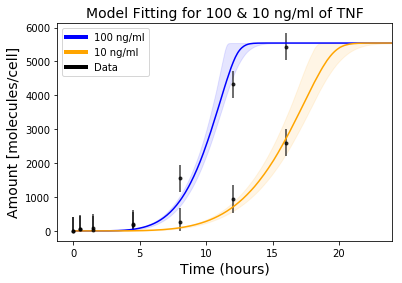

In [23]:
#FOR PLOTTING PERCENTILES 

# x10 = np.array([0, 30, 90, 270, 480,600, 720, 840, 960])
# # x102 = np.array([600, 720, 840, 960])
# y10 = np.array([0, 0.0106013664572332,0.00519576571714913,0.02967443048221,0.050022163974868,
#                 0.088128107774737, 0.17, 0.30055140114867, 0.47])
# # y102 = np.array([0.088128107774737, 0.17, 0.30055140114867, 0.47])

# x100 = np.array([0, 30, 90, 270,480, 600, 720, 840, 960])
# # x1002 = np.array([480, 600, 720, 840, 960])
# y100 = np.array([0, 0.00885691708746097,0.0161886154261265,0.0373005242261882,
#                   0.2798939020159581, 0.510, .8097294067, 0.95,0.98])

x1001 = np.array([0, 30, 90, 270])
x1002 = np.array([480, 720, 960])
y1001 = np.array([0, 0.00885691708746097,0.0161886154261265,0.0373005242261882])
y1002 = np.array([0.2798939020159581, .7797294067, 0.98])
# plt.figure()

x101 = np.array([0, 30, 90, 270, 480])
x102 = np.array([720, 960])
y101 = np.array([0, 0.0106013664572332,0.00519576571714913,0.02967443048221,0.050022163974868])
y102 = np.array([0.17, 0.47])
# Combine the results dataframes into a single dataframe with a 'group' index,
# in addition to "simulation" and "time" indexes
df = pd.concat([result100.dataframe, result10.dataframe],
               keys=['mlkl100', 'mlkl10'],
               names=['group', 'simulation', 'time'])

# Add observable/group pairs as needed
obs_to_plot = {
    ('MLKLa_obs', 'mlkl100'): 'blue',
    ('MLKLa_obs', 'mlkl10'): 'orange'
}

lower_quantile = 0.1  # 10%
upper_quantile = 0.9  # 90%
median = 0.5

fig, ax = plt.subplots()
# plt.figure()
legend_keys = []
for obs_pair, colour in obs_to_plot.items():
    obs, group = obs_pair
    # Calculate 10%, 50%, and 90% quantiles for observable
    quantile_data = df[obs].loc[group].groupby(['time']).quantile(
        q=[lower_quantile, median, upper_quantile]).unstack()
    time_hrs = quantile_data.index / 60
    # Plot the median line (50% quantile) for the observable
    ax.plot(time_hrs, quantile_data.loc[:, median], color=colour)
    # Plot the 10% and 90% quantiles as an envelope
    ax.fill_between(time_hrs,
                    quantile_data.loc[:, lower_quantile],
                    quantile_data.loc[:, upper_quantile],
                    color=colour,
                    alpha=.1)

# Add the legend

# plt.legend([f'{obs} {group}' for obs, group in obs_to_plot.keys()])
plt.title('Model Fitting for 100 & 10 ng/ml of TNF',fontsize=14) # Title
plt.ylabel('Amount [molecules/cell]', fontsize = 14) # Y label
plt.xlabel('Time (hours)', fontsize = 14) # X label
plt.xlim(xmax =24)
# Add axis labels and title
# plt.set(xlabel='Time (hours)', ylabel='Amount [molecules/cell]', title=f'{model100.name}', fontsize = 14)
# Add grid
# ax.grid()
# plt.scatter(x101/60, y101*5544)
# plt.scatter(x101/60, y1002*5544)
# fig.savefig("necro_pydream_fitting_5k_5620_100_10tnf_wo_10_12hrs_norm.pdf")
# plt.errorbar(x1001/60, y1001,
#              yerr=[(0, 0.00885691708746097,0.0161886154261265,0.0373005242261882),
#              (.10,.10,.10,.10)],
#                    fmt='.k', ecolor ='black', alpha = 0.75, label ='100 ng/ml', zorder = 2)
# plt.errorbar(x1002/60, y1002,
#              yerr= .10, fmt='.k', ecolor ='black', alpha = 0.75, label ='100 ng/ml', zorder = 2)
# plt.errorbar(x100/60, y10*5544, yerr=350, fmt='.k', ecolor = 'blue', alpha = 0.5, label ='10 ng/ml')
# plt.errorbar(x100/60, y100*5544, yerr=350, fmt='.k', ecolor ='green', alpha = 0.5, label ='100 ng/ml')
plt.errorbar(x1001/60, y1001*5544,
             yerr=[(0, 0.00885691708746097*5544,0.0161886154261265*5544,0.0373005242261882*5544),
             (400,400,400,400)],
                   fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
plt.errorbar(x1002/60, y1002*5544,
             yerr= 400, fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
plt.errorbar(x101/60, y101*5544,
             yerr=[(0, 0.0106013664572332*5544,0.00519576571714913*5544,0.02967443048221*5544,
                    0.050022163974868*5544),
             (400,400,400,400,400)],
                   fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
plt.errorbar(x102/60, y102*5544,
             yerr= 400, fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
custom_lines = [Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='orange', lw=4),
                Line2D([0], [0], color='black', lw=4)]
plt.legend(custom_lines, ['100 ng/ml', '10 ng/ml', 'Data'], prop={'size': 10}, loc = 'best')
plt.show()

# Percentiles for 100 TNF vs A20 KO in Clus 0,1,2

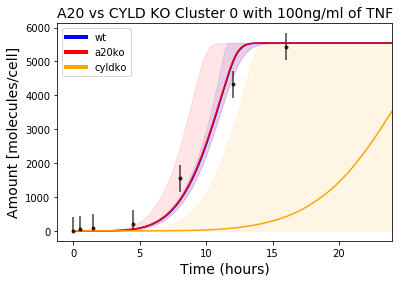

In [24]:
#FOR PLOTTING PERCENTILES 

# x10 = np.array([0, 30, 90, 270, 480,600, 720, 840, 960])
# # x102 = np.array([600, 720, 840, 960])
# y10 = np.array([0, 0.0106013664572332,0.00519576571714913,0.02967443048221,0.050022163974868,
#                 0.088128107774737, 0.17, 0.30055140114867, 0.47])
# # y102 = np.array([0.088128107774737, 0.17, 0.30055140114867, 0.47])

# x100 = np.array([0, 30, 90, 270,480, 600, 720, 840, 960])
# # x1002 = np.array([480, 600, 720, 840, 960])
# y100 = np.array([0, 0.00885691708746097,0.0161886154261265,0.0373005242261882,
#                   0.2798939020159581, 0.510, .8097294067, 0.95,0.98])

x1001 = np.array([0, 30, 90, 270])
x1002 = np.array([480, 720, 960])
y1001 = np.array([0, 0.00885691708746097,0.0161886154261265,0.0373005242261882])
y1002 = np.array([0.2798939020159581, .7797294067, 0.98])
# plt.figure()

x101 = np.array([0, 30, 90, 270, 480])
x102 = np.array([720, 960])
y101 = np.array([0, 0.0106013664572332,0.00519576571714913,0.02967443048221,0.050022163974868])
y102 = np.array([0.17, 0.47])
# Combine the results dataframes into a single dataframe with a 'group' index,
# in addition to "simulation" and "time" indexes
df = pd.concat([wtclus0.dataframe, a20clus0.dataframe, cyldclus0.dataframe],
               keys=['wt', 'a20ko', 'cyldko'],
               names=['group', 'simulation', 'time'])

# Add observable/group pairs as needed
obs_to_plot = {
    ('MLKLa_obs', 'wt'): 'blue',
    ('MLKLa_obs', 'a20ko'): 'red',
    ('MLKLa_obs', 'cyldko'): 'orange'
}

lower_quantile = 0.1  # 10%
upper_quantile = 0.9  # 90%
median = 0.5

fig, ax = plt.subplots()
# plt.figure()
legend_keys = []
for obs_pair, colour in obs_to_plot.items():
    obs, group = obs_pair
    # Calculate 10%, 50%, and 90% quantiles for observable
    quantile_data = df[obs].loc[group].groupby(['time']).quantile(
        q=[lower_quantile, median, upper_quantile]).unstack()
    time_hrs = quantile_data.index / 60
    # Plot the median line (50% quantile) for the observable
    ax.plot(time_hrs, quantile_data.loc[:, median], color=colour, alpha = 1.0)
    # Plot the 10% and 90% quantiles as an envelope
    ax.fill_between(time_hrs,
                    quantile_data.loc[:, lower_quantile],
                    quantile_data.loc[:, upper_quantile],
                    color=colour,
                    alpha=.1)

# Add the legend

# plt.legend([f'{obs} {group}' for obs, group in obs_to_plot.keys()])
plt.title('A20 vs CYLD KO Cluster 0 with 100ng/ml of TNF',fontsize=14) # Title
plt.ylabel('Amount [molecules/cell]', fontsize = 14) # Y label
plt.xlabel('Time (hours)', fontsize = 14) # X label
plt.xlim(xmax =24)
# Add axis labels and title
# plt.set(xlabel='Time (hours)', ylabel='Amount [molecules/cell]', title=f'{model100.name}', fontsize = 14)
# Add grid
# ax.grid()
# plt.scatter(x101/60, y101*5544)
# plt.scatter(x101/60, y1002*5544)
# fig.savefig("necro_pydream_fitting_5k_5620_100_10tnf_wo_10_12hrs.pdf")
# plt.errorbar(x1001/60, y1001,
#              yerr=[(0, 0.00885691708746097,0.0161886154261265,0.0373005242261882),
#              (.10,.10,.10,.10)],
#                    fmt='.k', ecolor ='black', alpha = 0.75, label ='100 ng/ml', zorder = 2)
# plt.errorbar(x1002/60, y1002,
#              yerr= .10, fmt='.k', ecolor ='black', alpha = 0.75, label ='100 ng/ml', zorder = 2)
# plt.errorbar(x100/60, y10*5544, yerr=350, fmt='.k', ecolor = 'blue', alpha = 0.5, label ='10 ng/ml')
# plt.errorbar(x100/60, y100*5544, yerr=350, fmt='.k', ecolor ='green', alpha = 0.5, label ='100 ng/ml')
plt.errorbar(x1001/60, y1001*5544,
             yerr=[(0, 0.00885691708746097*5544,0.0161886154261265*5544,0.0373005242261882*5544),
             (400,400,400,400)],
                   fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
plt.errorbar(x1002/60, y1002*5544,
             yerr= 400, fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
# plt.errorbar(x101/60, y101*5544,
#              yerr=[(0, 0.0106013664572332*5544,0.00519576571714913*5544,0.02967443048221*5544,
#                     0.050022163974868*5544),
#              (400,400,400,400,400)],
#                    fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
# plt.errorbar(x102/60, y102*5544,
#              yerr= 400, fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
custom_lines = [Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='red', lw=4),
                Line2D([0], [0], color='orange', lw=4)]
plt.legend(custom_lines, ['wt', 'a20ko', 'cyldko'], prop={'size': 10}, loc = 'best')
plt.show()

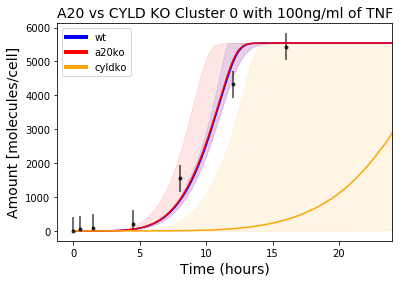

In [28]:
#FOR PLOTTING PERCENTILES 

# x10 = np.array([0, 30, 90, 270, 480,600, 720, 840, 960])
# # x102 = np.array([600, 720, 840, 960])
# y10 = np.array([0, 0.0106013664572332,0.00519576571714913,0.02967443048221,0.050022163974868,
#                 0.088128107774737, 0.17, 0.30055140114867, 0.47])
# # y102 = np.array([0.088128107774737, 0.17, 0.30055140114867, 0.47])

# x100 = np.array([0, 30, 90, 270,480, 600, 720, 840, 960])
# # x1002 = np.array([480, 600, 720, 840, 960])
# y100 = np.array([0, 0.00885691708746097,0.0161886154261265,0.0373005242261882,
#                   0.2798939020159581, 0.510, .8097294067, 0.95,0.98])

x1001 = np.array([0, 30, 90, 270])
x1002 = np.array([480, 720, 960])
y1001 = np.array([0, 0.00885691708746097,0.0161886154261265,0.0373005242261882])
y1002 = np.array([0.2798939020159581, .7797294067, 0.98])
# plt.figure()

x101 = np.array([0, 30, 90, 270, 480])
x102 = np.array([720, 960])
y101 = np.array([0, 0.0106013664572332,0.00519576571714913,0.02967443048221,0.050022163974868])
y102 = np.array([0.17, 0.47])
# Combine the results dataframes into a single dataframe with a 'group' index,
# in addition to "simulation" and "time" indexes
df = pd.concat([wtclus1.dataframe, a20clus1.dataframe, cyldclus1.dataframe],
               keys=['wt', 'a20ko', 'cyldko'],
               names=['group', 'simulation', 'time'])

# Add observable/group pairs as needed
obs_to_plot = {
    ('MLKLa_obs', 'wt'): 'blue',
    ('MLKLa_obs', 'a20ko'): 'red',
    ('MLKLa_obs', 'cyldko'): 'orange'
}

lower_quantile = 0.1  # 10%
upper_quantile = 0.9  # 90%
median = 0.5

fig, ax = plt.subplots()
# plt.figure()
legend_keys = []
for obs_pair, colour in obs_to_plot.items():
    obs, group = obs_pair
    # Calculate 10%, 50%, and 90% quantiles for observable
    quantile_data = df[obs].loc[group].groupby(['time']).quantile(
        q=[lower_quantile, median, upper_quantile]).unstack()
    time_hrs = quantile_data.index / 60
    # Plot the median line (50% quantile) for the observable
    ax.plot(time_hrs, quantile_data.loc[:, median], color=colour, alpha = 1.0)
    # Plot the 10% and 90% quantiles as an envelope
    ax.fill_between(time_hrs,
                    quantile_data.loc[:, lower_quantile],
                    quantile_data.loc[:, upper_quantile],
                    color=colour,
                    alpha=.1)

# Add the legend

# plt.legend([f'{obs} {group}' for obs, group in obs_to_plot.keys()])
plt.title('A20 vs CYLD KO Cluster 0 with 100ng/ml of TNF',fontsize=14) # Title
plt.ylabel('Amount [molecules/cell]', fontsize = 14) # Y label
plt.xlabel('Time (hours)', fontsize = 14) # X label
plt.xlim(xmax =24)
# Add axis labels and title
# plt.set(xlabel='Time (hours)', ylabel='Amount [molecules/cell]', title=f'{model100.name}', fontsize = 14)
# Add grid
# ax.grid()
# plt.scatter(x101/60, y101*5544)
# plt.scatter(x101/60, y1002*5544)
# fig.savefig("necro_pydream_fitting_5k_5620_100_10tnf_wo_10_12hrs.pdf")
# plt.errorbar(x1001/60, y1001,
#              yerr=[(0, 0.00885691708746097,0.0161886154261265,0.0373005242261882),
#              (.10,.10,.10,.10)],
#                    fmt='.k', ecolor ='black', alpha = 0.75, label ='100 ng/ml', zorder = 2)
# plt.errorbar(x1002/60, y1002,
#              yerr= .10, fmt='.k', ecolor ='black', alpha = 0.75, label ='100 ng/ml', zorder = 2)
# plt.errorbar(x100/60, y10*5544, yerr=350, fmt='.k', ecolor = 'blue', alpha = 0.5, label ='10 ng/ml')
# plt.errorbar(x100/60, y100*5544, yerr=350, fmt='.k', ecolor ='green', alpha = 0.5, label ='100 ng/ml')
plt.errorbar(x1001/60, y1001*5544,
             yerr=[(0, 0.00885691708746097*5544,0.0161886154261265*5544,0.0373005242261882*5544),
             (400,400,400,400)],
                   fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
plt.errorbar(x1002/60, y1002*5544,
             yerr= 400, fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
# plt.errorbar(x101/60, y101*5544,
#              yerr=[(0, 0.0106013664572332*5544,0.00519576571714913*5544,0.02967443048221*5544,
#                     0.050022163974868*5544),
#              (400,400,400,400,400)],
#                    fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
# plt.errorbar(x102/60, y102*5544,
#              yerr= 400, fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
custom_lines = [Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='red', lw=4),
                Line2D([0], [0], color='orange', lw=4)]
plt.legend(custom_lines, ['wt', 'a20ko', 'cyldko'], prop={'size': 10}, loc = 'best')
plt.show()

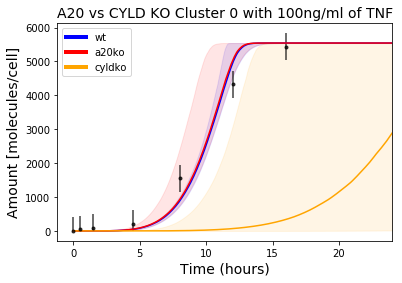

In [29]:
#FOR PLOTTING PERCENTILES 

# x10 = np.array([0, 30, 90, 270, 480,600, 720, 840, 960])
# # x102 = np.array([600, 720, 840, 960])
# y10 = np.array([0, 0.0106013664572332,0.00519576571714913,0.02967443048221,0.050022163974868,
#                 0.088128107774737, 0.17, 0.30055140114867, 0.47])
# # y102 = np.array([0.088128107774737, 0.17, 0.30055140114867, 0.47])

# x100 = np.array([0, 30, 90, 270,480, 600, 720, 840, 960])
# # x1002 = np.array([480, 600, 720, 840, 960])
# y100 = np.array([0, 0.00885691708746097,0.0161886154261265,0.0373005242261882,
#                   0.2798939020159581, 0.510, .8097294067, 0.95,0.98])

x1001 = np.array([0, 30, 90, 270])
x1002 = np.array([480, 720, 960])
y1001 = np.array([0, 0.00885691708746097,0.0161886154261265,0.0373005242261882])
y1002 = np.array([0.2798939020159581, .7797294067, 0.98])
# plt.figure()

x101 = np.array([0, 30, 90, 270, 480])
x102 = np.array([720, 960])
y101 = np.array([0, 0.0106013664572332,0.00519576571714913,0.02967443048221,0.050022163974868])
y102 = np.array([0.17, 0.47])
# Combine the results dataframes into a single dataframe with a 'group' index,
# in addition to "simulation" and "time" indexes
df = pd.concat([wtclus2.dataframe, a20clus2.dataframe, cyldclus2.dataframe],
               keys=['wt', 'a20ko', 'cyldko'],
               names=['group', 'simulation', 'time'])

# Add observable/group pairs as needed
obs_to_plot = {
    ('MLKLa_obs', 'wt'): 'blue',
    ('MLKLa_obs', 'a20ko'): 'red',
    ('MLKLa_obs', 'cyldko'): 'orange'
}

lower_quantile = 0.1  # 10%
upper_quantile = 0.9  # 90%
median = 0.5

fig, ax = plt.subplots()
# plt.figure()
legend_keys = []
for obs_pair, colour in obs_to_plot.items():
    obs, group = obs_pair
    # Calculate 10%, 50%, and 90% quantiles for observable
    quantile_data = df[obs].loc[group].groupby(['time']).quantile(
        q=[lower_quantile, median, upper_quantile]).unstack()
    time_hrs = quantile_data.index / 60
    # Plot the median line (50% quantile) for the observable
    ax.plot(time_hrs, quantile_data.loc[:, median], color=colour, alpha = 1.0)
    # Plot the 10% and 90% quantiles as an envelope
    ax.fill_between(time_hrs,
                    quantile_data.loc[:, lower_quantile],
                    quantile_data.loc[:, upper_quantile],
                    color=colour,
                    alpha=.1)

# Add the legend

# plt.legend([f'{obs} {group}' for obs, group in obs_to_plot.keys()])
plt.title('A20 vs CYLD KO Cluster 0 with 100ng/ml of TNF',fontsize=14) # Title
plt.ylabel('Amount [molecules/cell]', fontsize = 14) # Y label
plt.xlabel('Time (hours)', fontsize = 14) # X label
plt.xlim(xmax =24)
# Add axis labels and title
# plt.set(xlabel='Time (hours)', ylabel='Amount [molecules/cell]', title=f'{model100.name}', fontsize = 14)
# Add grid
# ax.grid()
# plt.scatter(x101/60, y101*5544)
# plt.scatter(x101/60, y1002*5544)
# fig.savefig("necro_pydream_fitting_5k_5620_100_10tnf_wo_10_12hrs.pdf")
# plt.errorbar(x1001/60, y1001,
#              yerr=[(0, 0.00885691708746097,0.0161886154261265,0.0373005242261882),
#              (.10,.10,.10,.10)],
#                    fmt='.k', ecolor ='black', alpha = 0.75, label ='100 ng/ml', zorder = 2)
# plt.errorbar(x1002/60, y1002,
#              yerr= .10, fmt='.k', ecolor ='black', alpha = 0.75, label ='100 ng/ml', zorder = 2)
# plt.errorbar(x100/60, y10*5544, yerr=350, fmt='.k', ecolor = 'blue', alpha = 0.5, label ='10 ng/ml')
# plt.errorbar(x100/60, y100*5544, yerr=350, fmt='.k', ecolor ='green', alpha = 0.5, label ='100 ng/ml')
plt.errorbar(x1001/60, y1001*5544,
             yerr=[(0, 0.00885691708746097*5544,0.0161886154261265*5544,0.0373005242261882*5544),
             (400,400,400,400)],
                   fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
plt.errorbar(x1002/60, y1002*5544,
             yerr= 400, fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
# plt.errorbar(x101/60, y101*5544,
#              yerr=[(0, 0.0106013664572332*5544,0.00519576571714913*5544,0.02967443048221*5544,
#                     0.050022163974868*5544),
#              (400,400,400,400,400)],
#                    fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
# plt.errorbar(x102/60, y102*5544,
#              yerr= 400, fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
custom_lines = [Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='red', lw=4),
                Line2D([0], [0], color='orange', lw=4)]
plt.legend(custom_lines, ['wt', 'a20ko', 'cyldko'], prop={'size': 10}, loc = 'best')
plt.show()